In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [32]:
df = pd.read_csv("advertising_data.csv")
df.head()  

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
# Check for null values
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [34]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [35]:
df.drop_duplicates()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [36]:
# Remove the unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

In [37]:
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


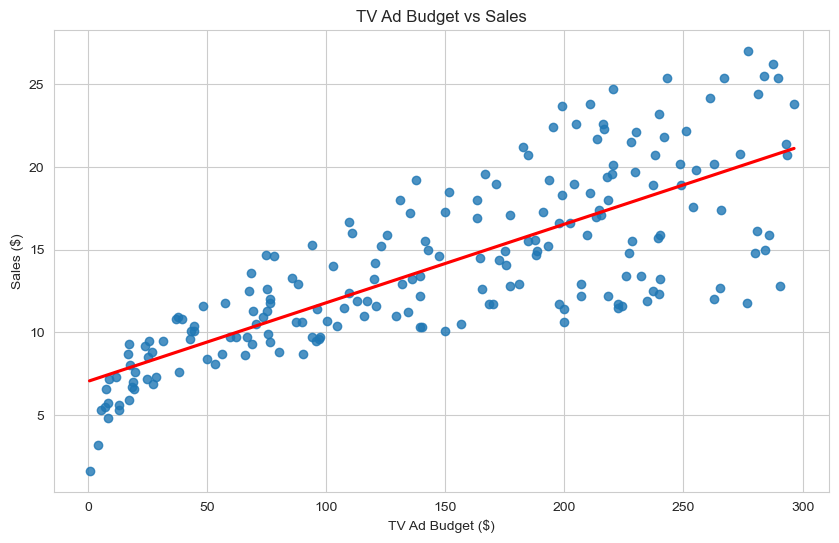

In [45]:
# TV Ad Budget vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TV Ad Budget ($)', y='Sales ($)', ci=None, line_kws={"color":"red"})
plt.title('TV Ad Budget vs Sales')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.show()

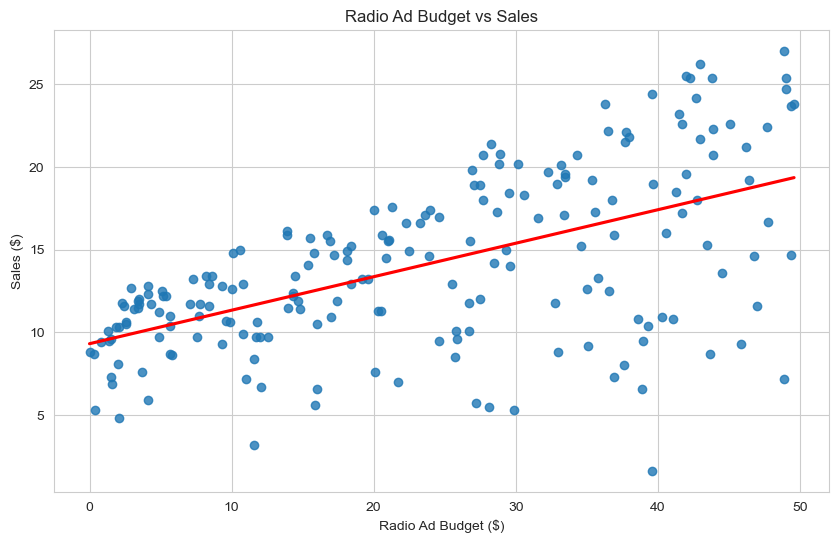

In [47]:
# Radio Ad Budget vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Radio Ad Budget ($)', y='Sales ($)', ci=None, line_kws={"color":"red"})
plt.title('Radio Ad Budget vs Sales')
plt.xlabel('Radio Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.show()

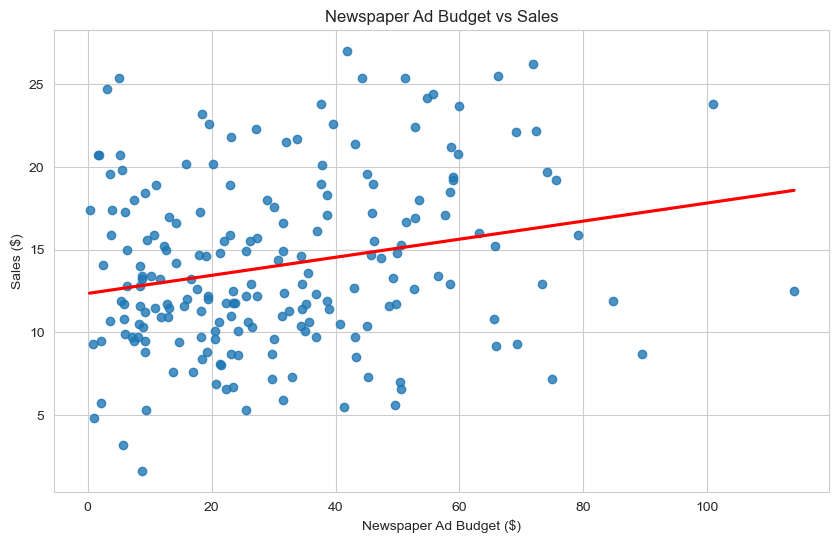

In [48]:
# Newspaper Ad Budget vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Newspaper Ad Budget ($)', y='Sales ($)', ci=None, line_kws={"color":"red"})
plt.title('Newspaper Ad Budget vs Sales')
plt.xlabel('Newspaper Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.show()


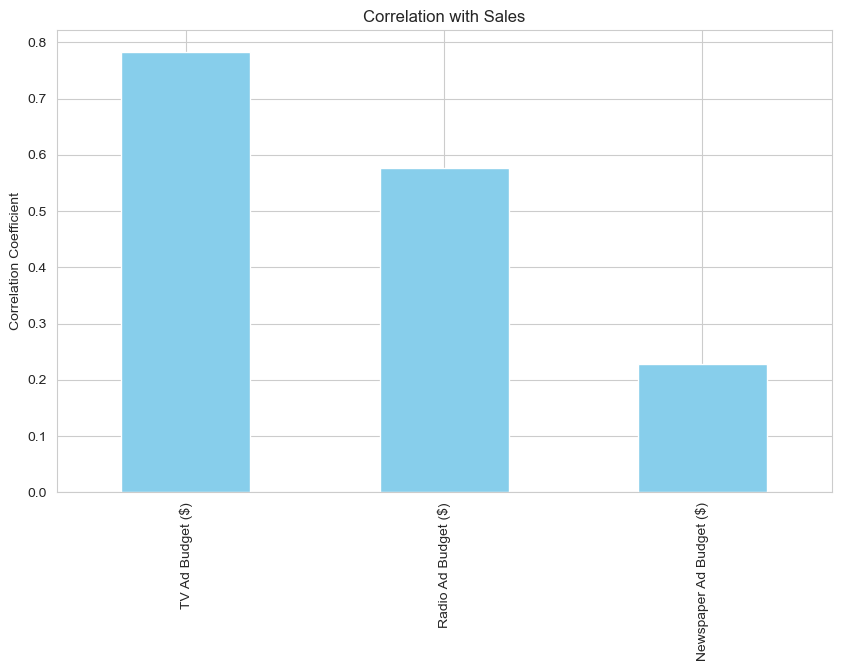

In [46]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values with Sales
correlation_with_sales = correlation_matrix['Sales ($)'].drop('Sales ($)')

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
correlation_with_sales.plot(kind='bar', color='skyblue')
plt.title('Correlation with Sales')
plt.ylabel('Correlation Coefficient')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop(columns=['Sales ($)'])
y = df['Sales ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.1740973539761015
R-squared: 0.8994380241009121
